# Restaurant Sales report
**Using EDA Analysis**

## Data Description:
This dataset captures sales transactions from a local restaurant. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

###### STEP1: import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### STEP2: Import .csv file 

In [2]:
df = pd.read_csv('Balaji Fast Food Sales.csv')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [3]:
print('\nshape:\n' , df.shape)
print('\nsize:\n' , df.size)
print('\ninfo:\n' , df.info())


shape:
 (1000, 10)

size:
 10000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB

info:
 None


***********************************************************
#### INFERENCE:
    1.This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
    
    2.Out of which 4-Numeric and 6-Catogorical data
    
    3.Data has 10 columns & 1000 rows providing information on transactions at a local restaurant.
 
 ***********************************************************

###### STEP3: Check the Duplicates 

In [4]:
#Duplicate
df_duplicate = df[df.duplicated(keep=False)]
df_duplicate

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


###### STEP4: null values handling

In [5]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [6]:
df['transaction_type'].unique()

array([nan, 'Cash', 'Online'], dtype=object)

In [7]:
df[['item_type','transaction_type']].value_counts().sort_index()

item_type  transaction_type
Beverages  Cash                148
           Online              126
Fastfood   Cash                328
           Online              291
Name: count, dtype: int64

***********************************************************
As per the analysis since the null value is 10% for transaction_type we can go with mode value, so we will replace nulll value with the mode value of item_type

NOTE: There are different ways to solve this problem but we will use the approach that most values are used in place of Null Values

***********************************************************

In [8]:
df['transaction_type'].fillna(value='Cash',inplace=True)

In [9]:
df[['item_type','transaction_type']].value_counts().sort_index()

item_type  transaction_type
Beverages  Cash                188
           Online              126
Fastfood   Cash                395
           Online              291
Name: count, dtype: int64

In [10]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

###### STEP5: Check and correct DataType also check for annomalies

In [12]:
# replace '/' to '-' from date column
df['date'] = df['date'].str.replace('/', '-')

# Changing date from object to date datatype
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


###### STEP6: Seperate Categoric & Numberic columns

In [13]:
num_col = df.select_dtypes(include = np.number).columns.to_list()
cat_col = df.select_dtypes(include = 'object').columns.to_list()

In [14]:
print('The numeric columns are', num_col)
print('The categorical columns are', cat_col)
print('The date column : date')

The numeric columns are ['order_id', 'item_price', 'quantity', 'transaction_amount']
The categorical columns are ['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']
The date column : date


In [47]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,Month_Year
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night,2022-07
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-02
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-10
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening,2023-03
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening,2022-09
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Cash,Mr.,Evening,2023-01
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Cash,Mrs.,Afternoon,2022-08


###### STEP7: Analysis

In [52]:
df.describe(percentiles=[0.25,0.4,0.6,0.75,0.8] ,include='all')

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,Month_Year
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000
unique,NaN,NaN,7,2,NaN,NaN,NaN,2,2,5,12
top,NaN,NaN,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night,2022-05
freq,NaN,NaN,161,686,NaN,NaN,NaN,583,512,205,100
mean,500.500000,2022-10-03 14:39:50.400000,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN,NaN
min,1.000000,2022-04-01 00:00:00,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN,NaN
25%,250.750000,2022-07-04 00:00:00,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN,NaN
40%,400.600000,2022-08-31 00:00:00,NaN,NaN,20.000000,7.000000,200.000000,NaN,NaN,NaN,NaN
50%,500.500000,2022-10-07 12:00:00,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN,NaN
60%,600.400000,2022-11-10 00:00:00,NaN,NaN,40.000000,10.000000,280.000000,NaN,NaN,NaN,NaN


***********************************************************
#### Inference

    1.For item_price the values are between 20-60 and most values are near 40

***********************************************************

In [ ]:
#check for outliers

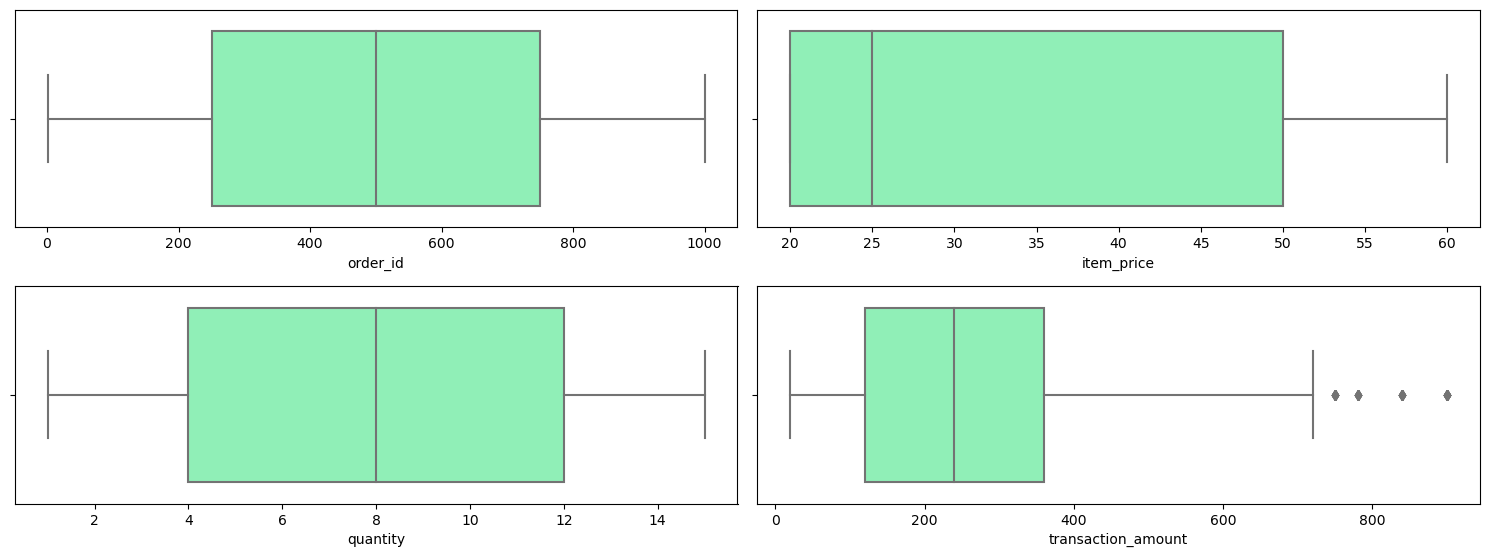

In [48]:
t=1
for i in num_col:
    plt.subplot(3,2,t)
    sns.boxplot(x=df[i], palette='rainbow')
    t+=1
    plt.xticks()
plt.tight_layout()
plt.show()

In [58]:
#Skewness
print('The Skew value of each columns:\n')
for i in num_col:
    a = ''
    if df[i].skew() == 0:
        a='Normal_Sknewness'
    elif df[i].skew() > 0:
        a='Positive_Skewness'
    elif df[i].skew() < 0:
        a='Negative_Skewness'
    print(i,':',df[i].skew(),'&',a)
    
print('\n\n****************************\n\n')
    
#Kurtosis
print('The Kurtosis value of each columns:\n')
for i in num_col:
    a = ''
    if df[i].kurt() == 3:
        a='MesoKurtic'
    elif df[i].kurt() > 3:
        a='LeptoKurtic'
    elif df[i].kurt() < 3:
        a='PlatyKurtic'
        
    print(i,':',df[i].kurt(),'& it is',a)

The Skew value of each columns:

order_id : 0.0 & Normal_Sknewness
item_price : 0.6250044803515558 & Positive_Skewness
quantity : -0.05129947454908782 & Negative_Skewness
transaction_amount : 1.052643178230624 & Positive_Skewness


****************************


The Kurtosis value of each columns:

order_id : -1.2 & it is PlatyKurtic
item_price : -1.173262217524134 & it is PlatyKurtic
quantity : -1.2416861155903576 & it is PlatyKurtic
transaction_amount : 0.6554065709917558 & it is PlatyKurtic


***********************************************************
#### INFERENCE
    1. All the numerical column have flat tail
    2. We have transaction_amount as positive skew that contains 4 outlier
    
***********************************************************

#### Monthwise revenue of each item 

In [16]:
df['Month_Year'] = df['date'].dt.to_period("M")

In [19]:
revenue = pd.pivot_table(df,values='transaction_amount',index='Month_Year',columns='item_name')

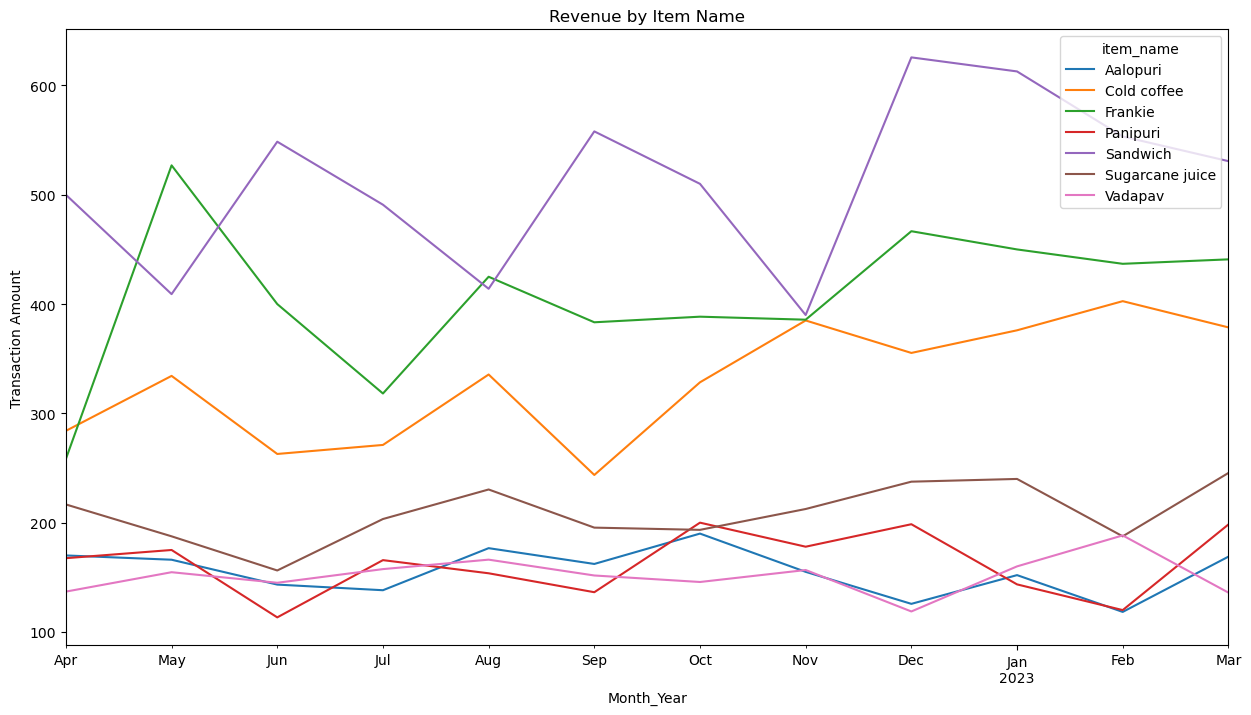

In [30]:
plt.rcParams['figure.figsize'] = [15,8]
revenue.plot(kind='line' , title='Revenue by Item Name')
plt.ylabel('Transaction Amount')
plt.show()

#### Overall analysis of all columns

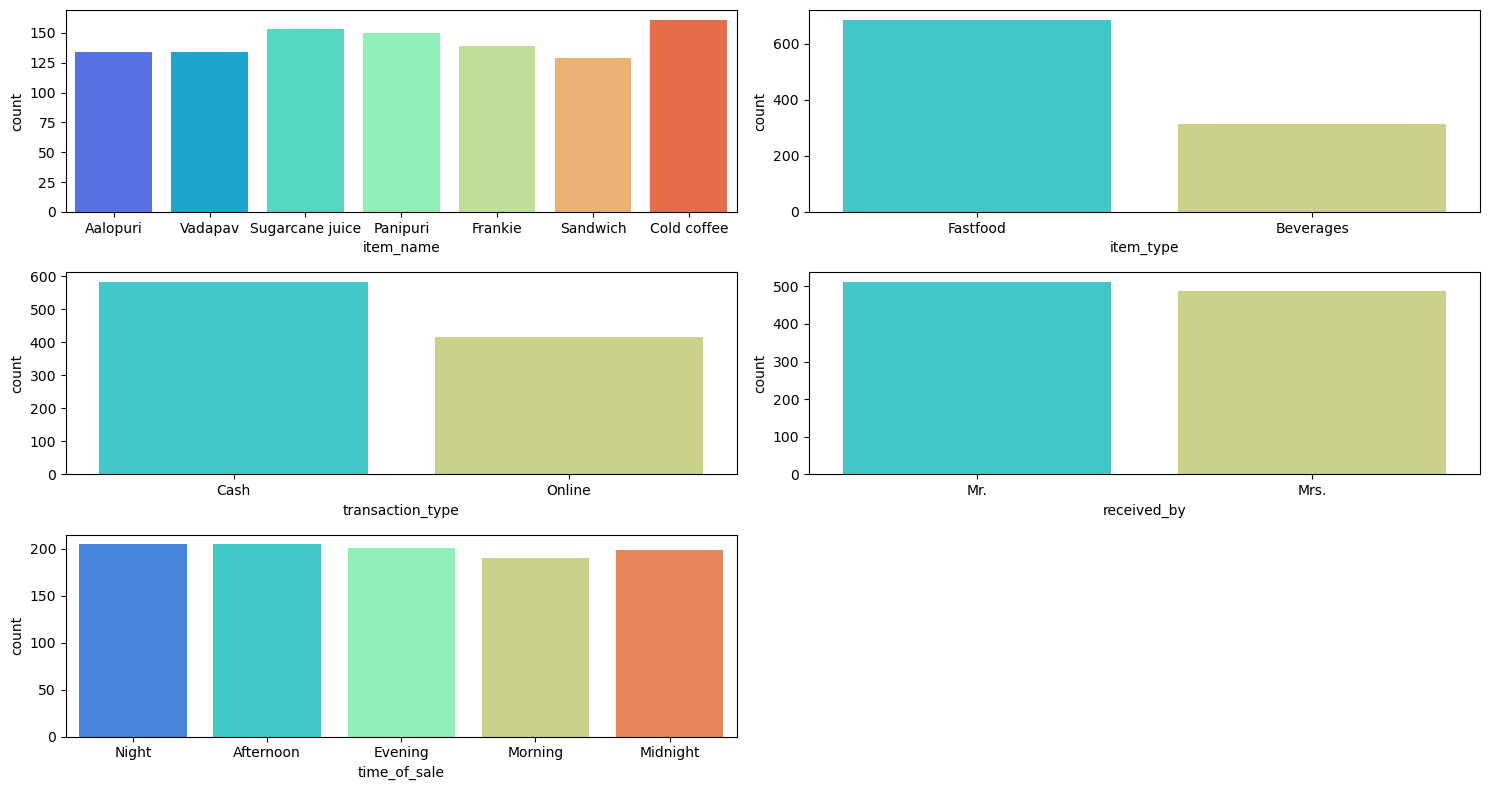

In [32]:
t=1
for i in cat_col:
    plt.subplot(3,2,t)
    sns.countplot(x=df[i], palette='rainbow')
    t+=1
    plt.xticks()
plt.tight_layout()
plt.show()

In [36]:
print('The unique value_counts of each column')
for i in cat_col:
    print('\n In',df[i].value_counts(normalize=True)*100)
    print('\n*************')

The unique value_counts of each column

 In item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

*************

 In item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

*************

 In transaction_type
Cash      58.3
Online    41.7
Name: proportion, dtype: float64

*************

 In received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

*************

 In time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.9
Morning      19.0
Name: proportion, dtype: float64

*************


***********************************************************
#### INFERENCE
    1. Most top 3 selling item is Cold Coffee, Sugarcane Juice, and Pani Puri
    2. Most selling type are Fastfoods
    3. Many are preffered Cash payment and sales done by men are bit higher than sales by women.
    4. Most orders are in morning & night
    
***********************************************************    

#### Most selling item during the time of sale

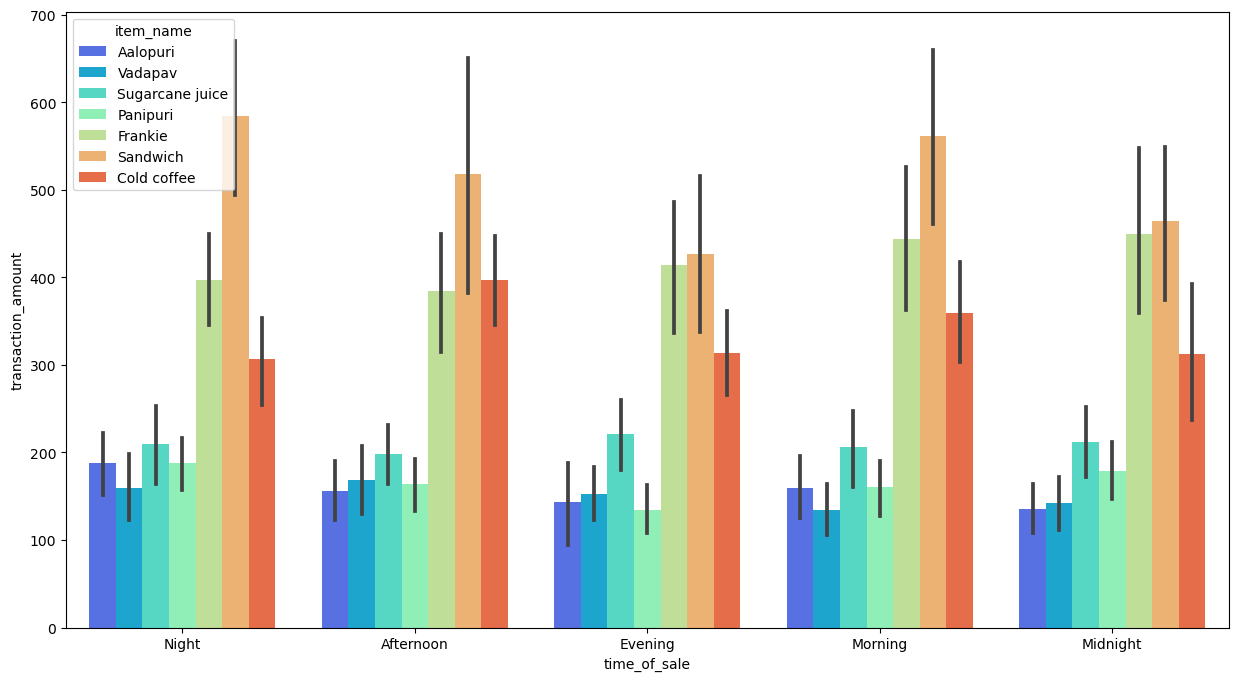

In [35]:
sns.barplot(data=df,x='time_of_sale', y='transaction_amount', hue='item_name',palette='rainbow')
plt.show()

In [39]:
pd.pivot_table(df,values='transaction_amount',index='time_of_sale',columns='item_name')

item_name,Aalopuri,Cold coffee,Frankie,Panipuri,Sandwich,Sugarcane juice,Vadapav
time_of_sale,,,,,,,
Afternoon,155.862069,396.470588,383.870968,164.285714,517.894737,198.170732,168.695652
Evening,143.157895,313.333333,413.793103,133.888889,426.206897,221.093750,153.076923
Midnight,135.151515,312.307692,450.000000,179.354839,463.846154,211.607143,142.424242
Morning,159.259259,358.750000,443.478261,160.689655,561.600000,206.000000,134.482759
Night,187.692308,306.666667,397.058824,187.692308,584.000000,210.185185,159.130435


***********************************************************
#### Inference
    1.During the night and morning hours, people prefer visiting restaurants.
    2.sandwiches and frankies are the more popular items during these peak time compared to other times of the day.
***********************************************************

#### Num column correlation

In [51]:
df[num_col].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


***********************************************************
#### INFERENCE
    1. Transaction amount is highly dependent on quantity and item price
***********************************************************

# Summary

From the data of transactions at a local restaurant we found that

Top 3 most selling items are Cold Coffee, Sugarcane Juice, and Pani Puri and it shows that fast food items are more popular and have higher sales compared to beverages.

The most Transaction method used by customers is using cash rather than online payments and the amount is highly dependent on quantity and item price

we can see that during the night and morning hours, people prefer restaurants. And during both of these times, sandwiches and frankies are the more popular items compared to other times of the day.

And as per the gender based performance males have slightly higher performance in sales compared to females, although the difference is not significant.

